In [ ]:
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

project_root = Path.home() / 'Documents' / 'DeteccaoPlantas'
runs_path = project_root / 'runs' / 'detect' / 'treinamento_ervas_final'
best_weights = runs_path / 'weights' / 'best.pt'

assert best_weights.exists(), f"Pesos não encontrados: {best_weights}"


In [ ]:

modelo = YOLO(str(best_weights))


In [ ]:
metrics = modelo.val()

print("Precisão (P): ", metrics.results_dict['metrics/precision(B)'])
print("Recall (R):   ", metrics.results_dict['metrics/recall(B)'])
print("mAP@0.5:      ", metrics.results_dict['metrics/mAP50(B)'])
print("mAP@0.5:0.95: ", metrics.results_dict['metrics/mAP50-95(B)'])


Ultralytics 8.3.119  Python-3.11.0 torch-2.7.0+cpu CPU (Intel Core(TM) i7-8665U 1.90GHz)


Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 294.660.4 MB/s, size: 58.6 KB)


val: Scanning C:\Users\Cristina\Documents\DeteccaoPlantas\data\Weeds\valid\labels.cache... 359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 359/359 [00:00<?, ?it/s]
c:\Users\Cristina\Documents\DeteccaoPlantas\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:26<00:00,  1.14s/it]


                   all        359        920        0.9      0.899      0.944      0.704
Speed: 0.8ms preprocess, 60.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to c:\Users\Cristina\runs\detect\val11
Precisão (P):  0.8996379762435476
Recall (R):    0.8989130434782608
mAP@0.5:       0.9436841205935105
mAP@0.5:0.95:  0.7044113343306571


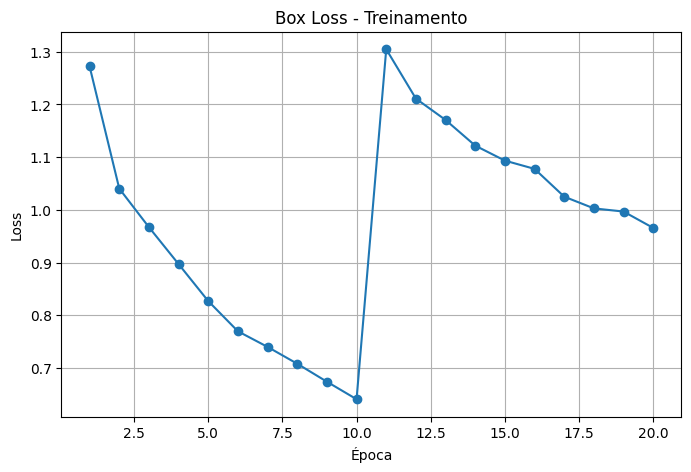

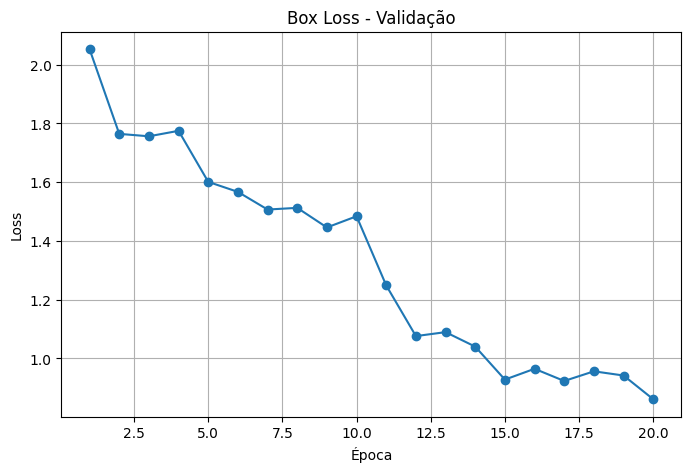

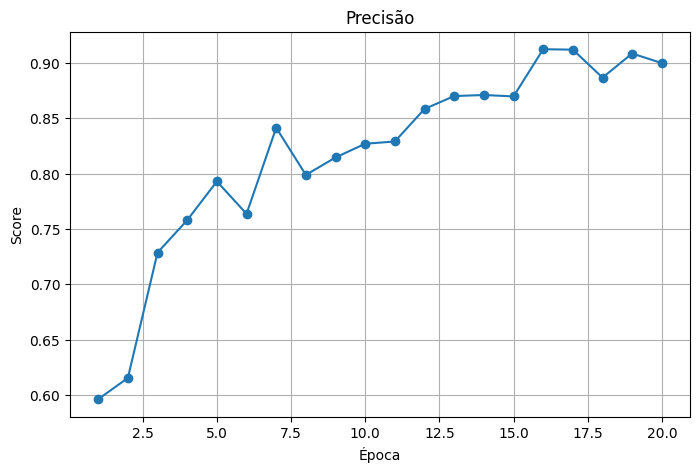

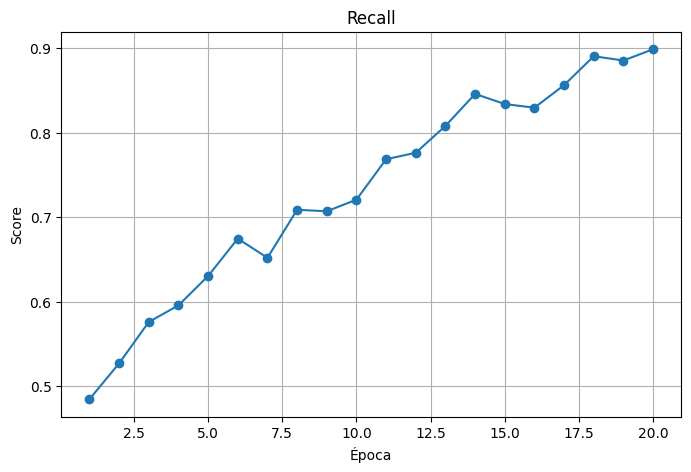

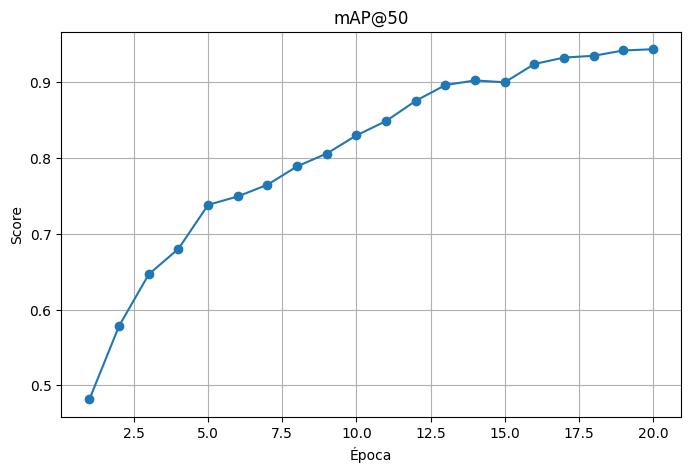

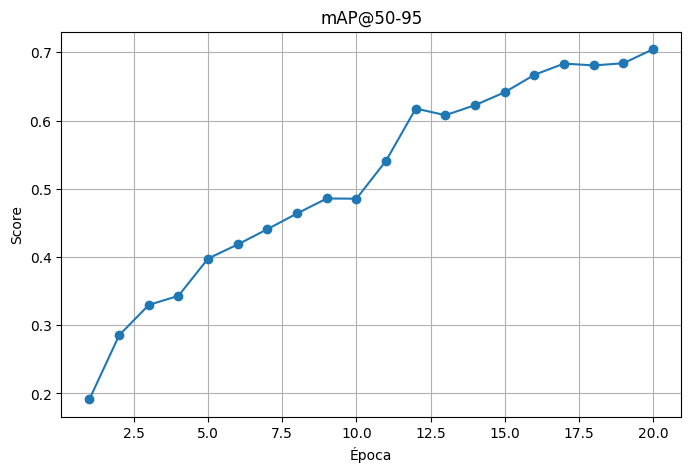

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.home() / 'Documents' / 'DeteccaoPlantas'
results_csv = project_root / 'runs' / 'detect' / 'treinamento_ervas_final' / 'results.csv'

df = pd.read_csv(results_csv)

def plot_metric(metric, title, ylabel):
    plt.figure(figsize=(8,5))
    plt.plot(df['epoch'], df[metric], marker='o')
    plt.title(title)
    plt.xlabel("Época")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_metric('train/box_loss', "Box Loss - Treinamento", "Loss")
plot_metric('val/box_loss', "Box Loss - Validação", "Loss")
plot_metric('metrics/precision(B)', "Precisão", "Score")
plot_metric('metrics/recall(B)', "Recall", "Score")
plot_metric('metrics/mAP50(B)', "mAP@50", "Score")
plot_metric('metrics/mAP50-95(B)', "mAP@50-95", "Score")



image 1/1 C:\Users\Cristina\Documents\DeteccaoPlantas\data\Weeds\test\images\20210907_153931_x264_mp4-1001_jpg.rf.10e747b443d1cd1f28967b51504cc446.jpg: 416x416 3 Weedss, 158.0ms
Speed: 1.3ms preprocess, 158.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


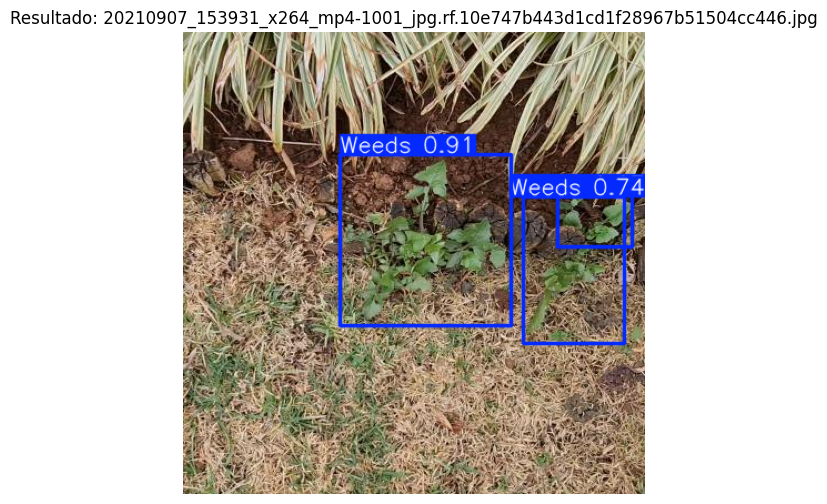


image 1/1 C:\Users\Cristina\Documents\DeteccaoPlantas\data\Weeds\test\images\20210907_153931_x264_mp4-1007_jpg.rf.c11266cd6af9ec693efd1e98ae6005c2.jpg: 416x416 1 Weeds, 103.9ms
Speed: 4.1ms preprocess, 103.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


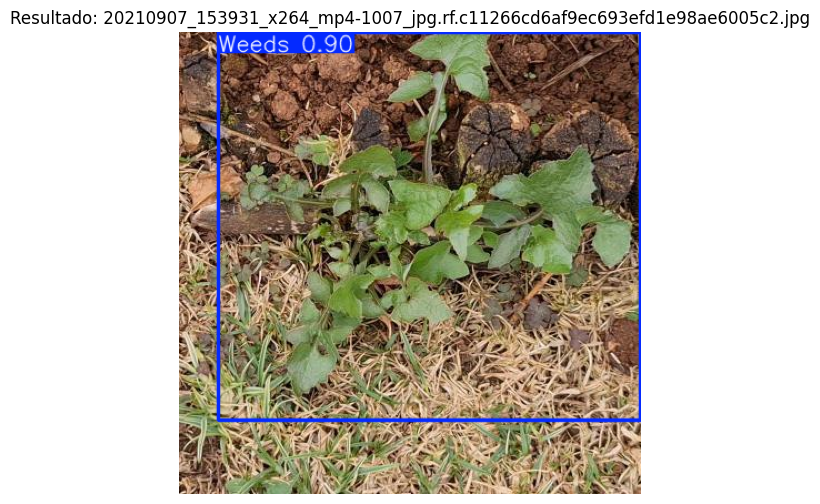


image 1/1 C:\Users\Cristina\Documents\DeteccaoPlantas\data\Weeds\test\images\20210907_153931_x264_mp4-1011_jpg.rf.fba5ba71a2e096e352d4feb2944fe727.jpg: 416x416 2 Weedss, 115.1ms
Speed: 2.8ms preprocess, 115.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


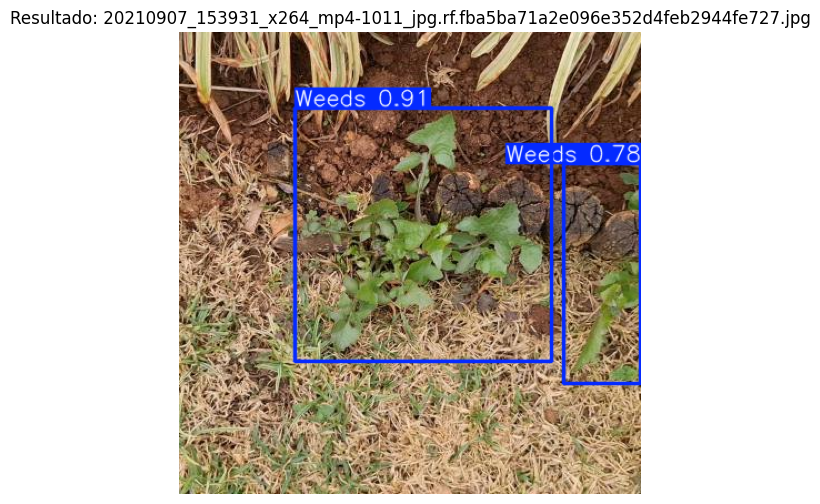

In [ ]:
%matplotlib inline

test_images_path = project_root / 'data' / 'Weeds' / 'test' / 'images'

sample_images = list(test_images_path.glob("*.jpg"))[:3]

for img_path in sample_images:
    results = modelo.predict(source=str(img_path), save=False, conf=0.5)

    for r in results:
        im_bgr = r.plot() 
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8,6))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title(f"Resultado: {img_path.name}")
        plt.show()
